### Genetic algorithm using Pymoo

#### Problem

In [1]:
from pymoo.core.problem import ElementwiseProblem, Problem

### Vectorized problem
class DeterministicProblem_P(Problem):
    def __init__(self):
        super().__init__(n_var=1, #Number of variables
                         n_obj=1, #Number of objective functions
                         n_ieq_constr=0, #Number of inequalities constraints
                         n_eq_constr=0, #Number of equalities constraints
                         xl=-5, #Lower threshold 
                         xu=5) #Upper threshold
        
    def _evaluate(self, x, out, *args, **kwargs):
        out["F"] = (x-3)**2

problem_p = DeterministicProblem_P()


### ElementwiseProblem
class DeterministicProblem_EWP(ElementwiseProblem):
    def __init__(self, elementwise=True, **kwargs):
        super().__init__(n_var = 1, #Number of variables
                         n_obj = 1, #Number of objective functions
                         n_ieq_constr=0, #Number of inequalities constraints
                         n_eq_constr=0, #Number of equalities constraints
                         xl = -5, #Lower threshold 
                         xu = 5) #Upper threshold
    
    def _evaluate(self, x, out, *args, **kwargs):
        out["F"] = (x-3)**2
        
problem_ewp = DeterministicProblem_EWP()

#### Algorithms

##### Single objective functions

In [15]:
from pymoo.algorithms.soo.nonconvex.de import DE
from pymoo.algorithms.soo.nonconvex.ga import GA
from pymoo.algorithms.soo.nonconvex.nelder import NelderMead
from pymoo.optimize import minimize

de_algo = DE(pop_size=50)
ga_algo = GA(pop_size=50)
nm_algo = NelderMead(init_simplex_scale=0.1)

res = minimize(problem=problem_ewp,
               algorithm=ga_algo,
               seed =1,
               verbose = False)

print(res.X)
print(res.F)
print(res.G) 

[3.00024187]
[5.85023765e-08]
[]


##### Multi-objective functions

In [25]:
import numpy as np

class BNH(Problem):
    def _init_(self):
        super().__init__(n_var= 2,
                         n_obj=2,
                         n_ieq_constr=2,
                         xl = np.array([0, 0]),
                         xu = np.array([5,3]))
        
    def _evaluate(self, x, out, *args, **kwargs):

        #Objective functions
        obj1 = 4*(x[:,0]**2) + 4*(x[:,1]**2) #Objective function 1
        obj2 = (x[:,0]-5)**2 + (x[:,1]-5)**2 #Objective function 2

        #Constraints, default orientation of constraints being met is < 0
        const1 = (x[:,0]-5)**2 + x[:,1]**2 - 25
        const2 = 7.7 - (x[:,0]-8)**2 -(x[:,1]+3)**2

        #Stacking objectives to "F" and constraints to "G"
        out["F"] = np.column_stack([obj1, obj2])
        out["G"] = np.column_stack([const1, const2])

In [26]:
bnh_problem = BNH()

In [29]:
from pymoo.util.plotting import plot
n_points = 50 

x1 = np.linspace(0,5, n_points)
x2 = np.linspace(0,3, n_points)

X = np.column_stack([x1, x2])
#plot(bnh_problem.evaluate(X, return_values_of=["F"]))

In [31]:
from pymoo.algorithms.moo.nsga2 import NSGA2
algorithm_nsga = NSGA2(pop_size=200)

res = minimize(problem= bnh_problem,
               algorithm=algorithm_nsga,
               seed=1,
               verbose=False)

plot(res.X, no_fill=True)
plot(res.F, )

ValueError: negative dimensions are not allowed

In [2]:
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.problems import get_problem
from pymoo.optimize import minimize

problem = get_problem("zdt1")

algorithm = NSGA2(pop_size=100)

res = minimize(problem,
               algorithm,
               ('n_gen', 10),
               seed=1,
               verbose=True)

# calculate a hash to show that all executions end with the same result
print("hash", res.F.sum())



n_gen  |  n_eval  | n_nds  |      igd      |       gd      |       hv     
     1 |      100 |     18 |  1.9687500927 |  2.6048048316 |  0.000000E+00
     2 |      200 |     22 |  1.9687500927 |  2.6551717460 |  0.000000E+00
     3 |      300 |     16 |  1.9156076841 |  2.6054011843 |  0.000000E+00
     4 |      400 |     27 |  1.9156076841 |  2.5981861153 |  0.000000E+00
     5 |      500 |     15 |  1.7845109513 |  2.5097347961 |  0.000000E+00
     6 |      600 |     15 |  1.5665669246 |  1.9741836262 |  0.000000E+00
     7 |      700 |     18 |  1.4888433157 |  1.9581850627 |  0.000000E+00
     8 |      800 |     19 |  1.4536833012 |  1.7639127072 |  0.000000E+00
     9 |      900 |     15 |  1.3258230370 |  1.8118192650 |  0.000000E+00
    10 |     1000 |     20 |  1.1683545980 |  1.7447809684 |  0.000000E+00
hash 58.62964054306852


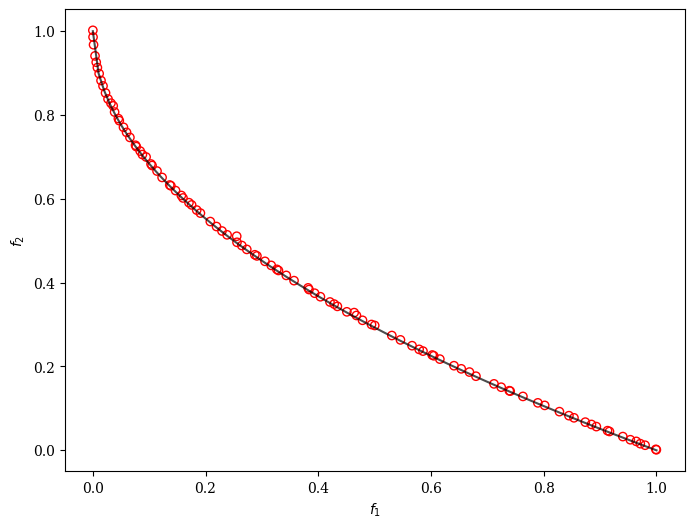

In [3]:
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.problems import get_problem
from pymoo.optimize import minimize
from pymoo.visualization.scatter import Scatter

problem = get_problem("zdt1")

algorithm = NSGA2(pop_size=100)

res = minimize(problem,
               algorithm,
               ('n_gen', 200),
               seed=1,
               verbose=False)

plot = Scatter()
plot.add(problem.pareto_front(), plot_type="line", color="black", alpha=0.7)
plot.add(res.F, facecolor="none", edgecolor="red")
plot.show()